# Autoregressors with Decision Trees

...

**Packages**

In [ ]:
# !pip install xgboost

In [61]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster

from sklearn.metrics import mean_squared_error

import warnings
# warnings.filterwarnings('ignore')

import datetime

import os
from pathlib import Path
project_path = Path(os.getcwd()).parent
import pickle
import joblib  

In [2]:
sns.set_style("whitegrid")

# Set Default Fonts
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Arial", "Tahoma"]

# Set Default font sizes
small_size = 12
medium_size = 14
large_size = 16

# # Change the font size for individual elements
matplotlib.rc("font", size=small_size)  # controls default text sizes
matplotlib.rc("axes", titlesize=small_size)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=medium_size)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)  # legend fontsize
matplotlib.rc("axes", titlesize=large_size)  # title fontsize

In [3]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

**Load data**

In [4]:
train = pd.read_parquet('../data/03_train-test/train_data.parquet')
test = pd.read_parquet('../data/03_train-test/test_data.parquet')

**Preparation of the data**

In [5]:
# set the index
train = train.set_index(['ds'])
test = test.set_index(['ds'])

# set the frequency
train = train.asfreq(freq='30min', fill_value=np.nan)
test = test.asfreq(freq='30min', fill_value=np.nan)

# fill nan-values
train = train.fillna(method='backfill')
test= test.fillna(method='backfill')

# conver to a Series object
train = train.squeeze()
test = test.squeeze()

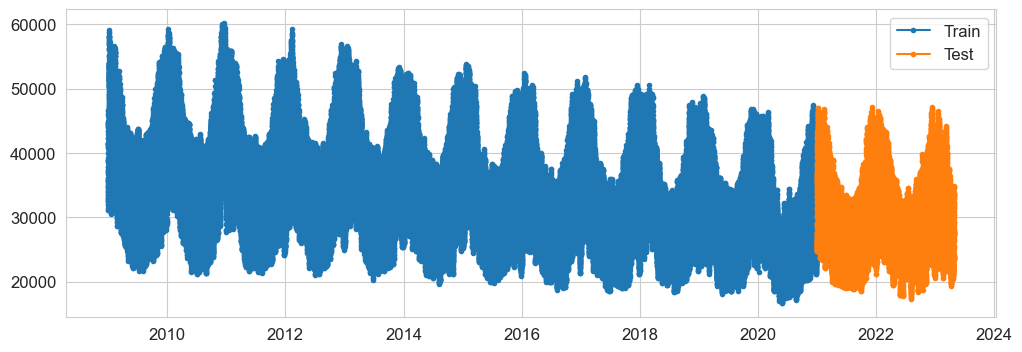

In [8]:
fig= plt.figure(figsize=(12,4))
plt.plot(train, marker='.', label='Train')
plt.plot(test, marker='.', label='Test')
plt.legend()

## Recursive multi-step forecasting 

...

In [10]:
steps = len(test)

### RandomForest

...

#### Model 1: Forecasting with the previous day

In [9]:
%%time
RF1 = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123, n_estimators=10),
                lags = 48)

RF1.fit(y=train) # fit the model

Wall time: 1min 38s


In [12]:
%%time
RF_pred1 = RF1.predict(steps=steps) # predict
RF_pred1.head(5)

Wall time: 33.1 s


2021-01-01 00:00:00    29123.8
2021-01-01 00:30:00    28987.7
2021-01-01 01:00:00    28674.3
2021-01-01 01:30:00    28224.2
2021-01-01 02:00:00    27958.2
Freq: 30T, Name: pred, dtype: float64

Text(0.5, 0, '')

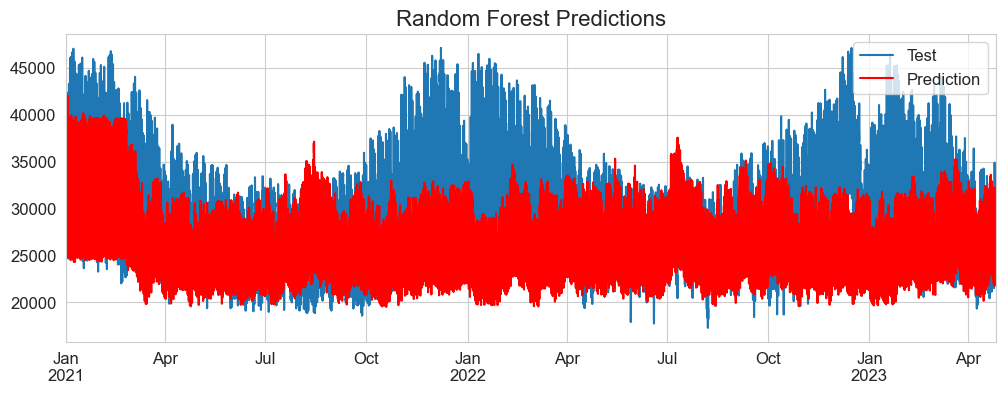

In [16]:
fig, ax = plt.subplots(figsize=(12, 4))
test.plot(ax=ax, label='Test')
RF_pred1.plot(ax=ax, label='Prediction', color='r')
ax.legend()
ax.set_title('Random Forest Predictions')
ax.set_xlabel('')

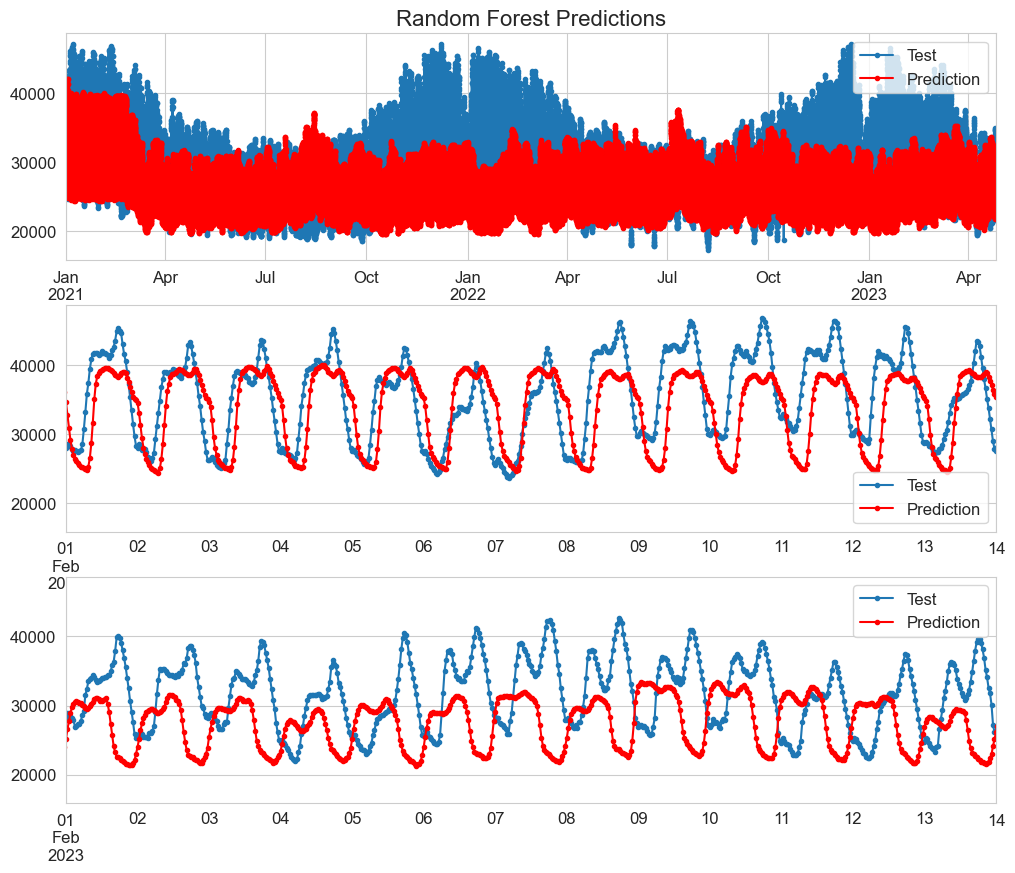

In [20]:
fig, (ax, bx, cx) = plt.subplots(3,1,figsize=(12, 10))

test.plot(ax=ax, marker='.', label='Test')
RF_pred1.plot(ax=ax, marker='.', label='Prediction', color='r')
ax.legend()
ax.set_title('Random Forest Predictions')
ax.set_xlabel('')

test.plot(ax=bx, marker='.', label='Test')
RF_pred1.plot(ax=bx, marker='.', label='Prediction', color='r')
bx.legend()
bx.set_xlabel('')
bx.set_xbound(lower=datetime.date(2021,2,1), upper=datetime.date(2021,2,14))

test.plot(ax=cx, marker='.', label='Test')
RF_pred1.plot(ax=cx, marker='.', label='Prediction', color='r')
cx.legend()
cx.set_xlabel('')
cx.set_xbound(lower=datetime.date(2023,2,1), upper=datetime.date(2023,2,14))

**Error**

In [24]:
RF_mse1  = mean_squared_error(y_true = test,y_pred = RF_pred1)
RF_mape1 = mean_absolute_percentage_error(y_true=test, y_pred=RF_pred1)

print('MAPE:', RF_mape1)
print('MSE: ', RF_mse1)

MAPE: 18.820462276578205
MSE:  50238635.61542955


#### Model 2: Forecasting with the previous week

In [31]:
%%time
RF2 = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123, n_estimators=10),
                lags = 48*7)

RF2.fit(y=train) # fit the model

Wall time: 10min 46s


In [ ]:
%%time
RF_pred2 = RF2.predict(steps=steps) # predict

Text(0.5, 0, '')

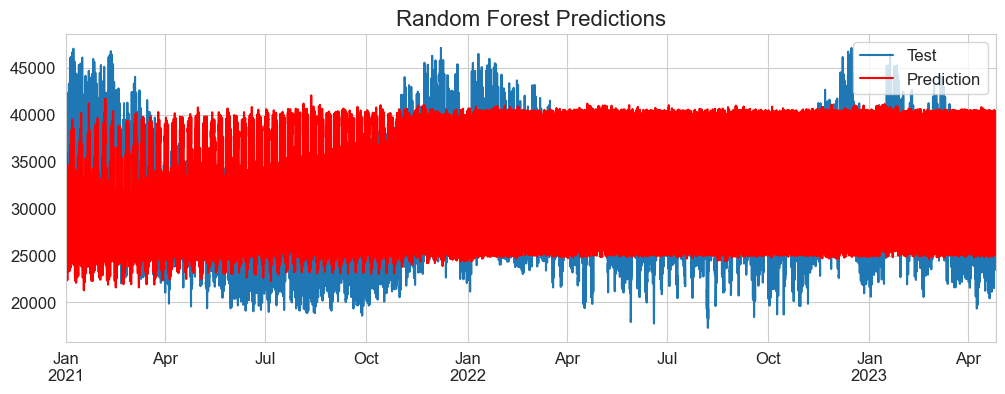

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))
test.plot(ax=ax, label='Test')
RF_pred2.plot(ax=ax, label='Prediction', color='r')
ax.legend()
ax.set_title('Random Forest Predictions')
ax.set_xlabel('')

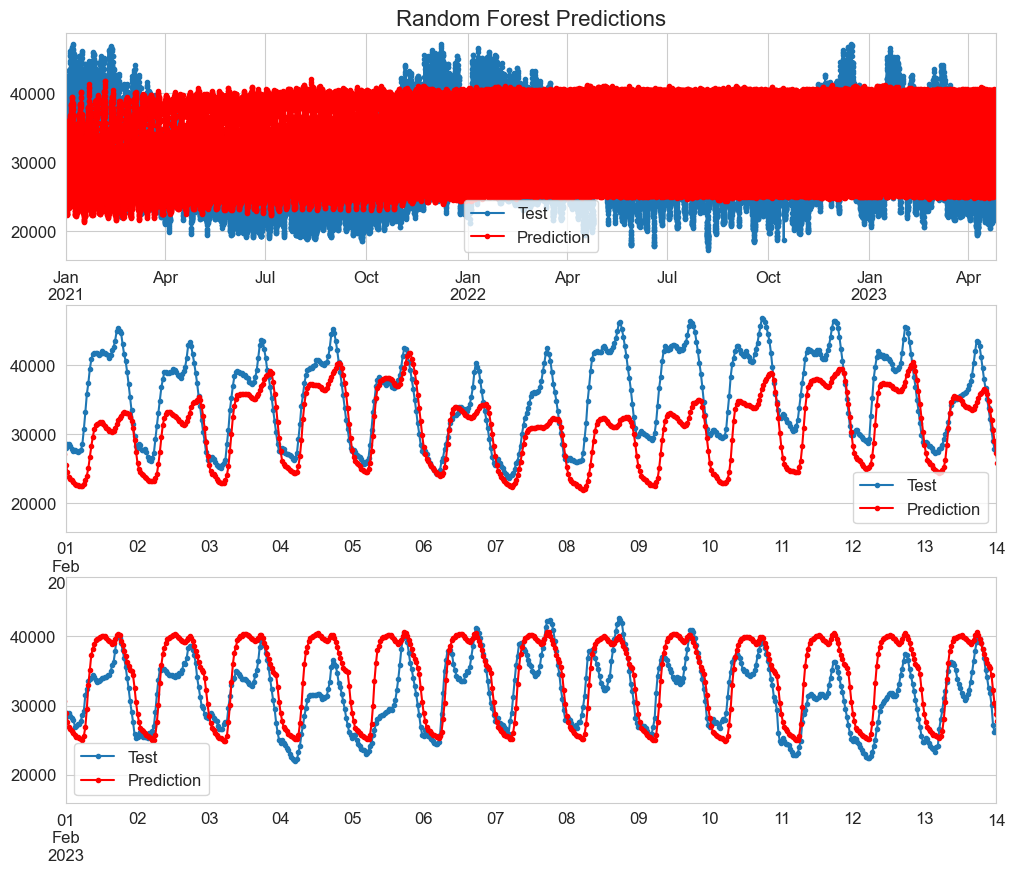

In [34]:
fig, (ax, bx, cx) = plt.subplots(3,1,figsize=(12, 10))

test.plot(ax=ax, marker='.', label='Test')
RF_pred2.plot(ax=ax, marker='.', label='Prediction', color='r')
ax.legend()
ax.set_title('Random Forest Predictions')
ax.set_xlabel('')

test.plot(ax=bx, marker='.', label='Test')
RF_pred2.plot(ax=bx, marker='.', label='Prediction', color='r')
bx.legend()
bx.set_xlabel('')
bx.set_xbound(lower=datetime.date(2021,2,1), upper=datetime.date(2021,2,14))

test.plot(ax=cx, marker='.', label='Test')
RF_pred2.plot(ax=cx, marker='.', label='Prediction', color='r')
cx.legend()
cx.set_xlabel('')
cx.set_xbound(lower=datetime.date(2023,2,1), upper=datetime.date(2023,2,14))

**Error**

In [35]:
RF_mse2  = mean_squared_error(y_true = test,y_pred = RF_pred2)
RF_mape2 = mean_absolute_percentage_error(y_true=test, y_pred=RF_pred2)

print('MAPE:', RF_mape2)
print('MSE: ', RF_mse2)

MAPE: 19.039458118657514
MSE:  44949987.36405498


#### Model 3: Forecasting with the previous month ??

### XGBoost

#### Model 1: Forecasting with the previous day

In [41]:
%%time
XGB1 = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=123, max_depth=5),
                lags = 48)

XGB1.fit(y=train) # fit the model

Wall time: 17.5 s


In [42]:
%%time
XGB_pred1 = XGB1.predict(steps=steps) # predict

Wall time: 1min


Text(0.5, 0, '')

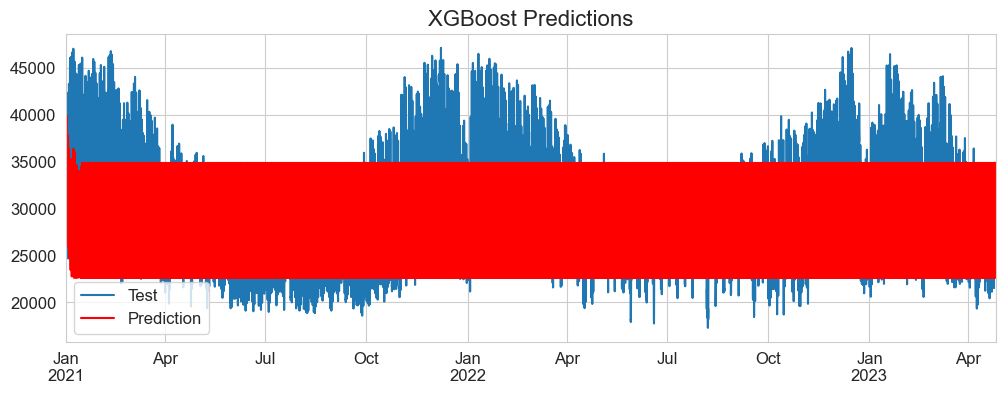

In [58]:
fig, ax = plt.subplots(figsize=(12, 4))
test.plot(ax=ax, label='Test')
XGB_pred1.plot(ax=ax, label='Prediction', color='r')
ax.legend()
ax.set_title('XGBoost Predictions')
ax.set_xlabel('')

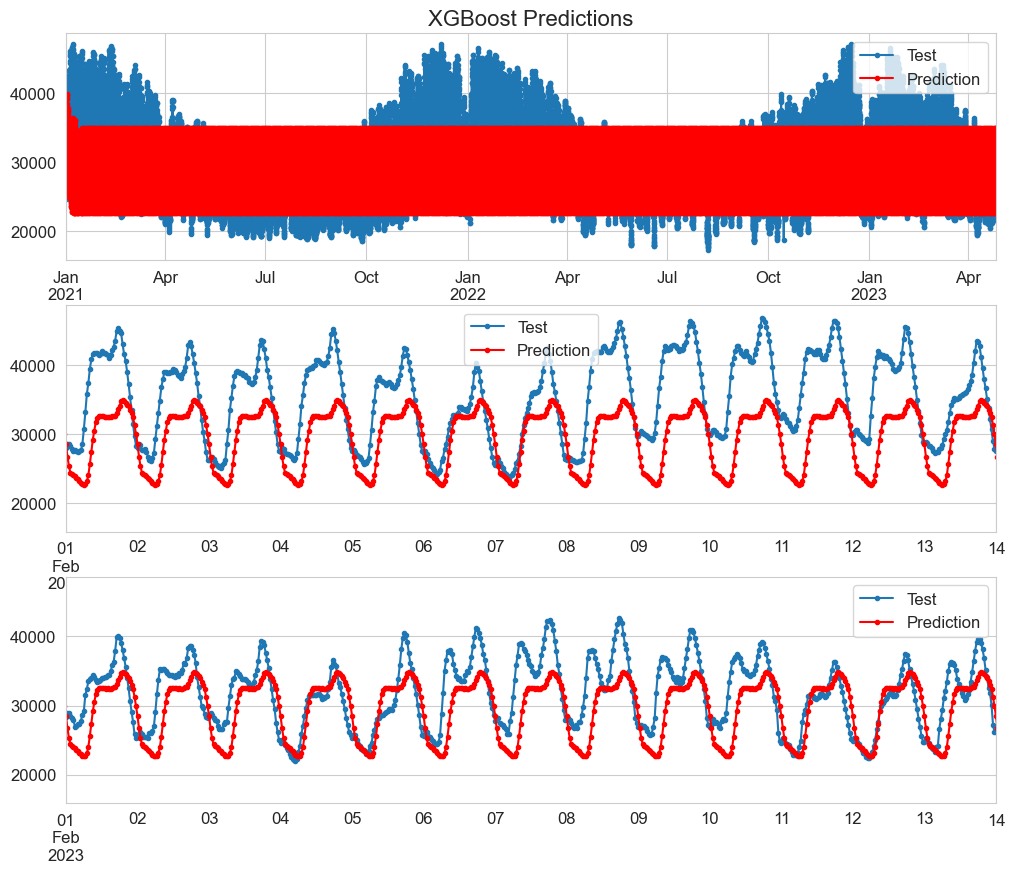

In [59]:
fig, (ax, bx, cx) = plt.subplots(3,1,figsize=(12, 10))

test.plot(ax=ax, marker='.', label='Test')
XGB_pred1.plot(ax=ax, marker='.', label='Prediction', color='r')
ax.legend()
ax.set_title('XGBoost Predictions')
ax.set_xlabel('')

test.plot(ax=bx, marker='.', label='Test')
XGB_pred1.plot(ax=bx, marker='.', label='Prediction', color='r')
bx.legend()
bx.set_xlabel('')
bx.set_xbound(lower=datetime.date(2021,2,1), upper=datetime.date(2021,2,14))

test.plot(ax=cx, marker='.', label='Test')
XGB_pred1.plot(ax=cx, marker='.', label='Prediction', color='r')
cx.legend()
cx.set_xlabel('')
cx.set_xbound(lower=datetime.date(2023,2,1), upper=datetime.date(2023,2,14))

**Error**

In [45]:
XGB_mse1  = mean_squared_error(y_true = test,y_pred = XGB_pred1)
XGB_mape1 = mean_absolute_percentage_error(y_true=test, y_pred=XGB_pred1)

print('MAPE:', XGB_mape1)
print('MSE: ', XGB_mse1)

MAPE: 13.128790020560485
MSE:  24235647.84642631


#### Model 2: Forecasting with the previous week

In [46]:
%%time
XGB2 = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123, n_estimators=10),
                lags = 48*7)

XGB2.fit(y=train) # fit the model

Wall time: 11min 46s


In [47]:
%%time
XGB_pred2 = XGB2.predict(steps=steps) # predict

Wall time: 32 s


Text(0.5, 0, '')

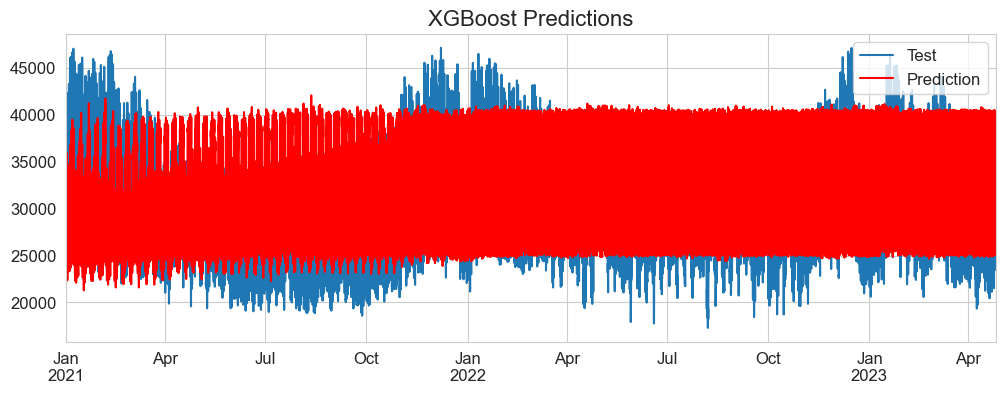

In [56]:
fig, ax = plt.subplots(figsize=(12, 4))
test.plot(ax=ax, label='Test')
XGB_pred2.plot(ax=ax, label='Prediction', color='r')
ax.legend()
ax.set_title('XGBoost Predictions')
ax.set_xlabel('')

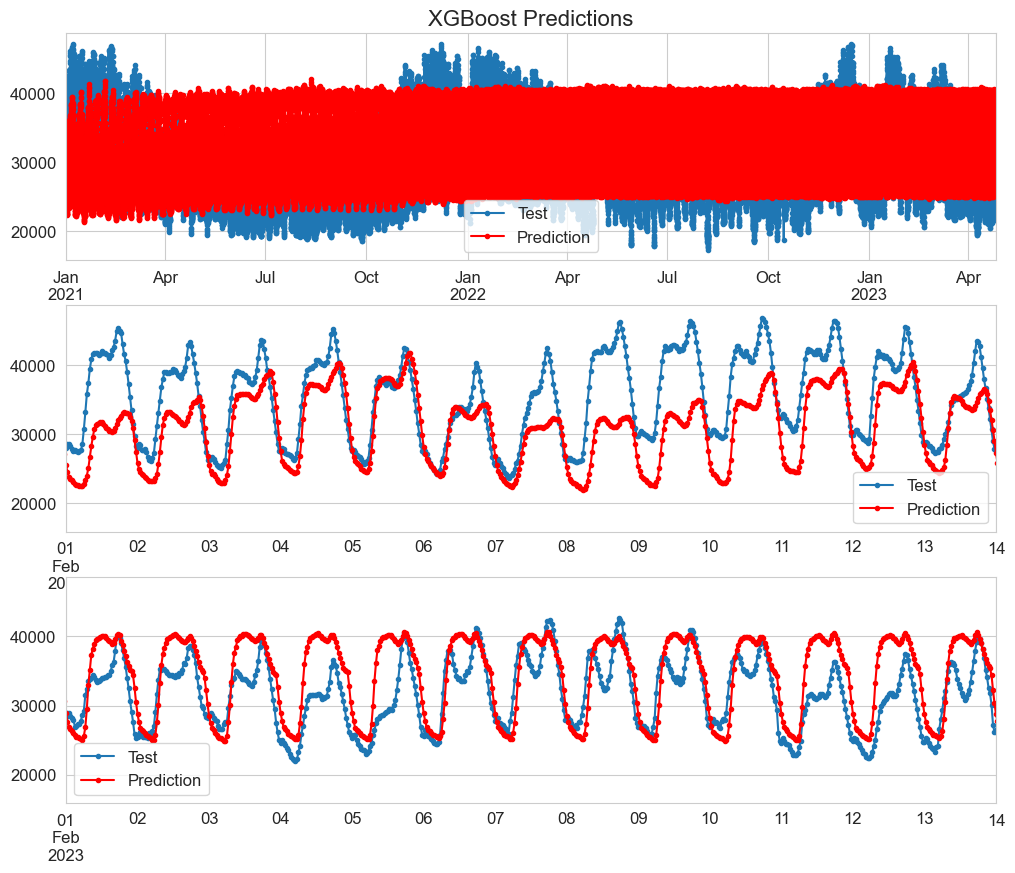

In [57]:
fig, (ax, bx, cx) = plt.subplots(3,1,figsize=(12, 10))

test.plot(ax=ax, marker='.', label='Test')
XGB_pred2.plot(ax=ax, marker='.', label='Prediction', color='r')
ax.legend()
ax.set_title('XGBoost Predictions')
ax.set_xlabel('')

test.plot(ax=bx, marker='.', label='Test')
XGB_pred2.plot(ax=bx, marker='.', label='Prediction', color='r')
bx.legend()
bx.set_xlabel('')
bx.set_xbound(lower=datetime.date(2021,2,1), upper=datetime.date(2021,2,14))

test.plot(ax=cx, marker='.', label='Test')
XGB_pred2.plot(ax=cx, marker='.', label='Prediction', color='r')
cx.legend()
cx.set_xlabel('')
cx.set_xbound(lower=datetime.date(2023,2,1), upper=datetime.date(2023,2,14))

**Error**

In [50]:
XGB_mse2  = mean_squared_error(y_true = test,y_pred = XGB_pred2)
XGB_mape2 = mean_absolute_percentage_error(y_true=test, y_pred=XGB_pred2)

print('MAPE:', XGB_mape2)
print('MSE: ', XGB_mse2)

MAPE: 19.039458118657514
MSE:  44949987.36405498


#### Model 3: Forecasting with the previous month

In [51]:
%%time
XGB3 = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123, n_estimators=10),
                lags = 48*30)

XGB3.fit(y=train) # fit the model

Wall time: 50min 52s


In [52]:
%%time
XGB_pred3 = XGB3.predict(steps=steps) # predict

Wall time: 31.9 s


Text(0.5, 0, '')

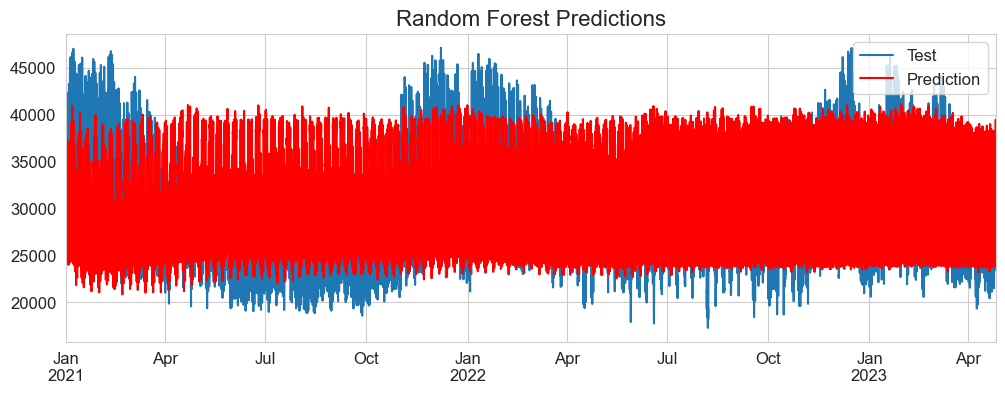

In [53]:
fig, ax = plt.subplots(figsize=(12, 4))
test.plot(ax=ax, label='Test')
XGB_pred3.plot(ax=ax, label='Prediction', color='r')
ax.legend()
ax.set_title('Random Forest Predictions')
ax.set_xlabel('')

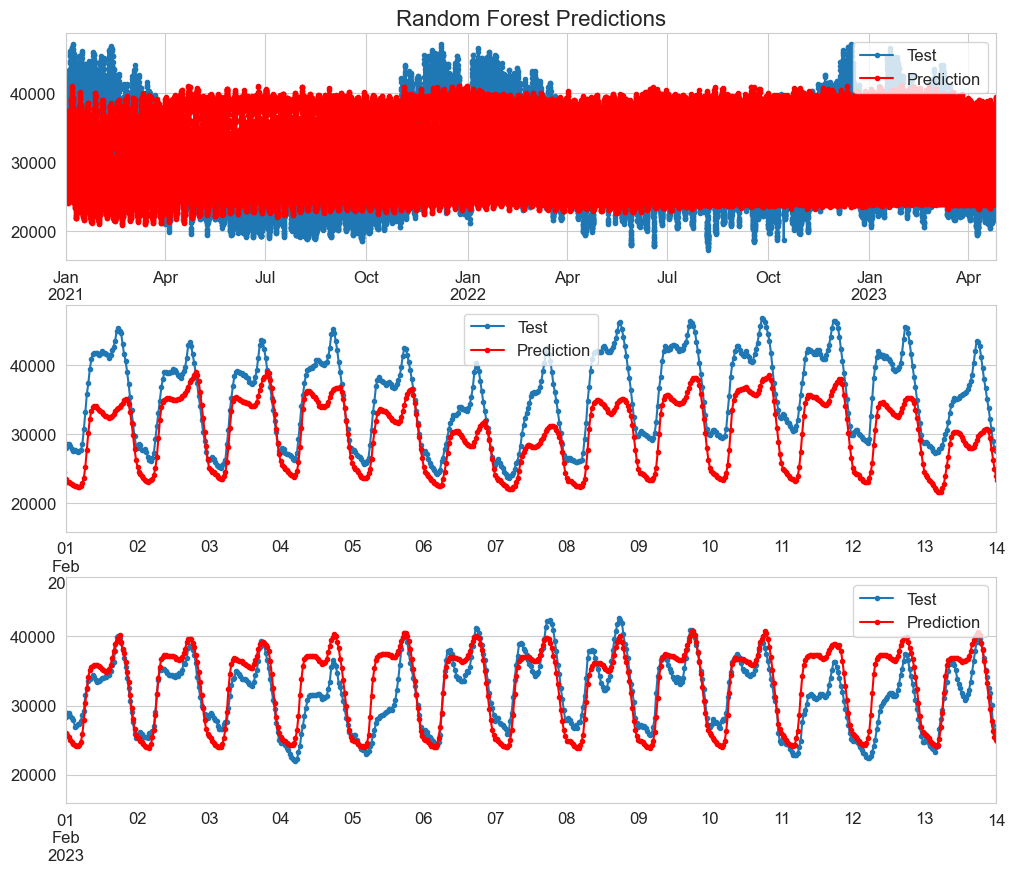

In [54]:
fig, (ax, bx, cx) = plt.subplots(3,1,figsize=(12, 10))

test.plot(ax=ax, marker='.', label='Test')
XGB_pred3.plot(ax=ax, marker='.', label='Prediction', color='r')
ax.legend()
ax.set_title('Random Forest Predictions')
ax.set_xlabel('')

test.plot(ax=bx, marker='.', label='Test')
XGB_pred3.plot(ax=bx, marker='.', label='Prediction', color='r')
bx.legend()
bx.set_xlabel('')
bx.set_xbound(lower=datetime.date(2021,2,1), upper=datetime.date(2021,2,14))

test.plot(ax=cx, marker='.', label='Test')
XGB_pred3.plot(ax=cx, marker='.', label='Prediction', color='r')
cx.legend()
cx.set_xlabel('')
cx.set_xbound(lower=datetime.date(2023,2,1), upper=datetime.date(2023,2,14))

**Error**

In [55]:
XGB_mse3  = mean_squared_error(y_true = test,y_pred = XGB_pred3)
XGB_mape3 = mean_absolute_percentage_error(y_true=test, y_pred=XGB_pred3)

print('MAPE:', XGB_mape3)
print('MSE: ', XGB_mse3)

MAPE: 14.975039694289322
MSE:  29374728.671074945


#### Model 4: Forecasting with the previous 3 months

In [ ]:
%%time
XGB4 = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123, n_estimators=10),
                lags = 48*90)

XGB4.fit(y=train) # fit the model

In [52]:
%%time
XGB_pred4 = XGB4.predict(steps=steps) # predict

Wall time: 31.9 s


Text(0.5, 0, '')

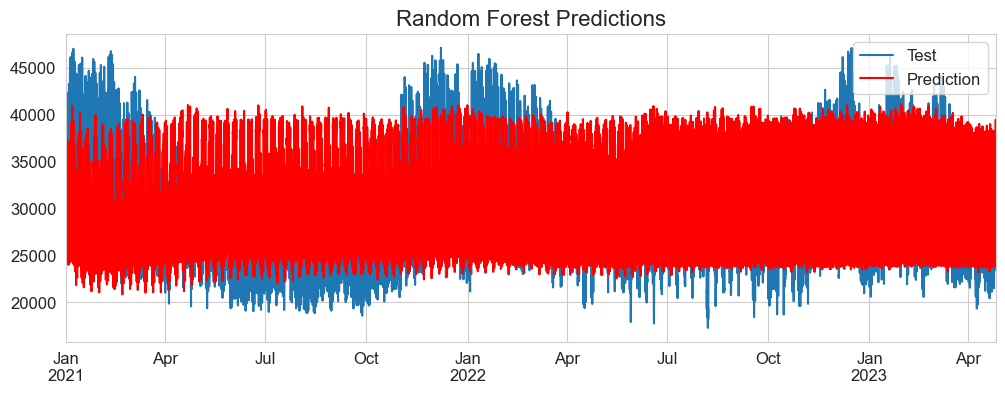

In [53]:
fig, ax = plt.subplots(figsize=(12, 4))
test.plot(ax=ax, label='Test')
XGB_pred4.plot(ax=ax, label='Prediction', color='r')
ax.legend()
ax.set_title('Random Forest Predictions')
ax.set_xlabel('')

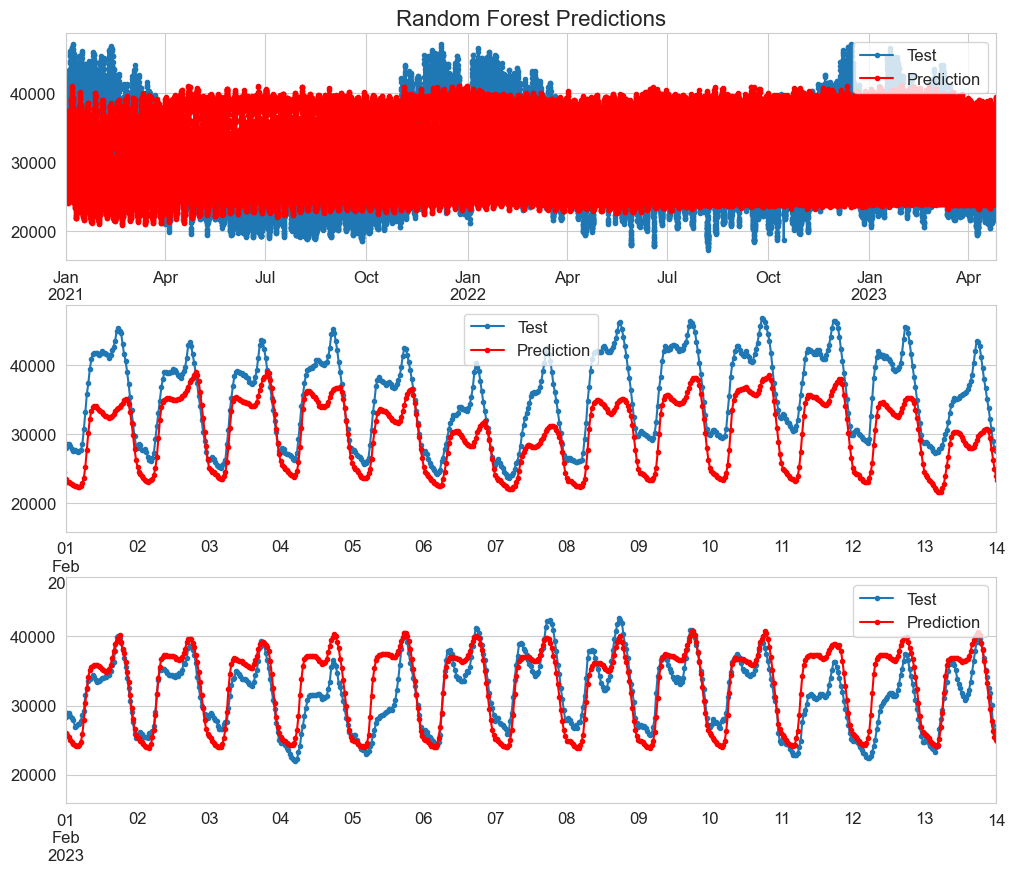

In [54]:
fig, (ax, bx, cx) = plt.subplots(3,1,figsize=(12, 10))

test.plot(ax=ax, marker='.', label='Test')
XGB_pred4.plot(ax=ax, marker='.', label='Prediction', color='r')
ax.legend()
ax.set_title('Random Forest Predictions')
ax.set_xlabel('')

test.plot(ax=bx, marker='.', label='Test')
XGB_pred4.plot(ax=bx, marker='.', label='Prediction', color='r')
bx.legend()
bx.set_xlabel('')
bx.set_xbound(lower=datetime.date(2021,2,1), upper=datetime.date(2021,2,14))

test.plot(ax=cx, marker='.', label='Test')
XGB_pred4.plot(ax=cx, marker='.', label='Prediction', color='r')
cx.legend()
cx.set_xlabel('')
cx.set_xbound(lower=datetime.date(2023,2,1), upper=datetime.date(2023,2,14))

**Error**

In [55]:
XGB_mse4  = mean_squared_error(y_true = test,y_pred = XGB_pred4)
XGB_mape4 = mean_absolute_percentage_error(y_true=test, y_pred=XGB_pred4)

print('MAPE:', XGB_mape4)
print('MSE: ', XGB_mse4)

MAPE: 14.975039694289322
MSE:  29374728.671074945


In [62]:
joblib.dump(RF1, project_path.joinpath('data/models/autoreg/RF1.pkl'))
joblib.dump(RF2, project_path.joinpath('data/models/autoreg/RF2.pkl'))
joblib.dump(XGB1, project_path.joinpath('data/models/autoreg/XGB1.pkl'))
joblib.dump(XGB2, project_path.joinpath('data/models/autoreg/XGB2.pkl'))
joblib.dump(XGB3, project_path.joinpath('data/models/autoreg/XGB3.pkl'))

['C:\\Users\\mpena\\OneDrive\\Escritorio\\TFG\\CODIGO\\TFG\\data\\models\\autoreg\\XGB3.pkl']